In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf 

In [5]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\Toyoto_Corrola.csv")
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [6]:
cars = df.drop(['Id','Model'],axis=1)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [8]:
cars.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation Matrix

In [9]:
cars.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [10]:
cars.describe()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [11]:
car1 = cars.drop(['Cylinders'],axis=1)
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Gears      1436 non-null   int64
 6   Weight     1436 non-null   int64
dtypes: int64(7)
memory usage: 78.7 KB


# Scatterplot between variables along with histograms

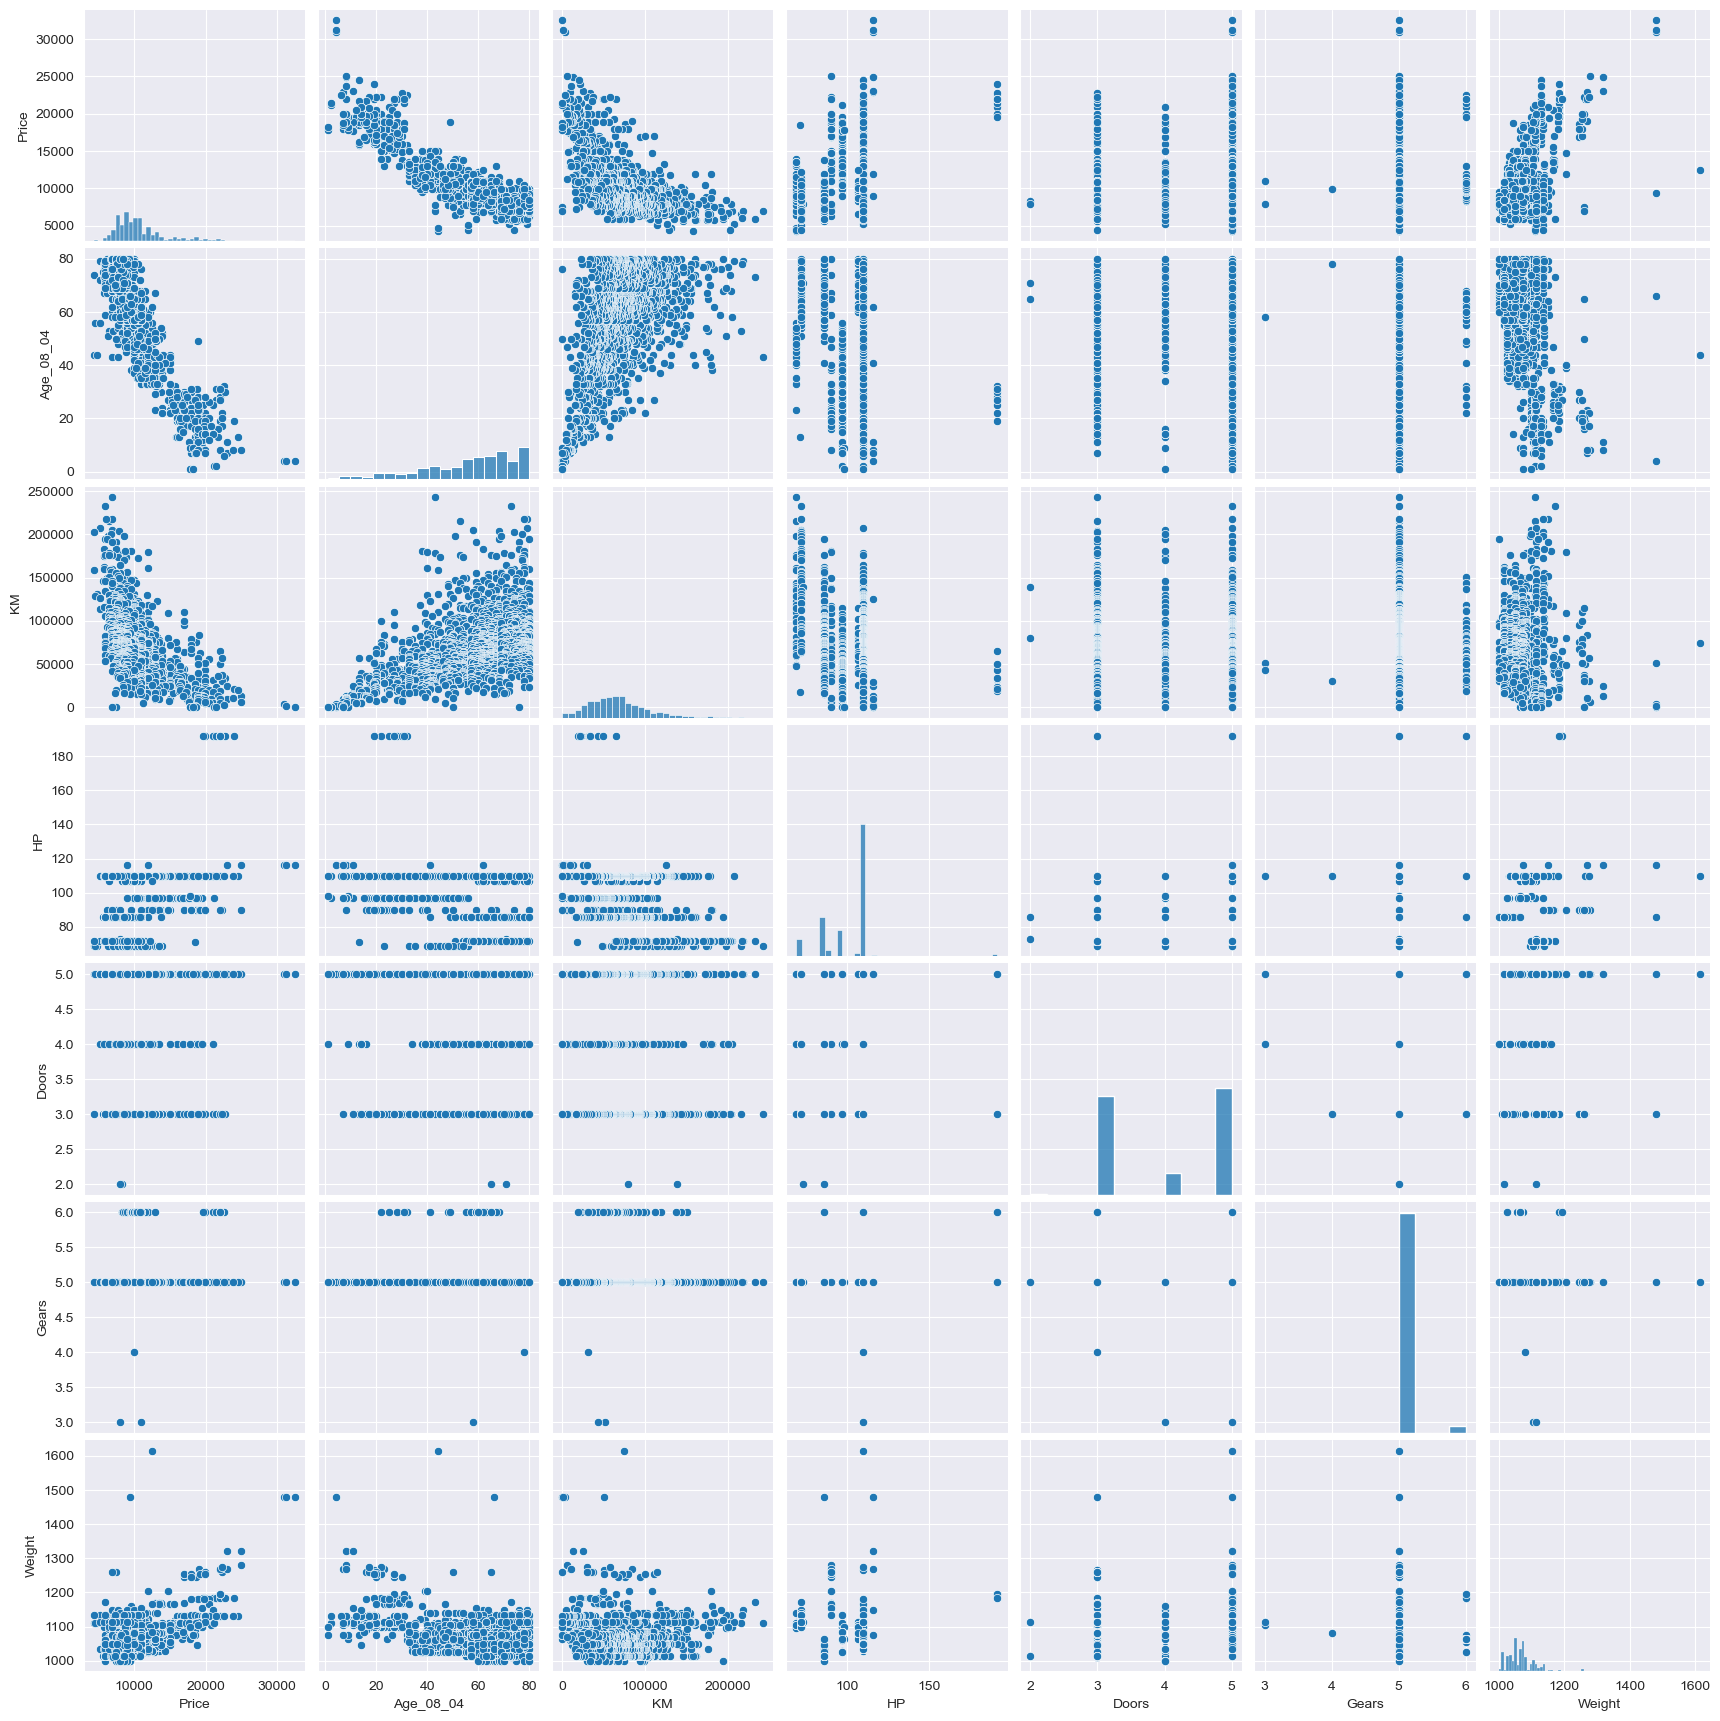

In [12]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(car1)

# Preparing Model 

In [13]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car1).fit()

In [14]:
#Coefficients
model.params

Intercept   -6984.373566
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [15]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [16]:
#R squared values 
(model.rsquared, model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

In [17]:
car2 = car1.drop(['Doors'],axis=1)

In [18]:
model1 = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=car2).fit()

In [19]:
#coefficients
model1.params

Intercept   -7006.827227
Age_08_04    -122.243676
KM             -0.019996
HP             28.282948
Gears         631.543519
Weight         18.557373
dtype: float64

In [20]:
#t and p values
print(model1.tvalues, '\n', model1.pvalues)

Intercept    -5.355584
Age_08_04   -46.745013
KM          -16.550661
HP           10.881794
Gears         3.262043
Weight       23.192000
dtype: float64 
 Intercept     9.925271e-08
Age_08_04    2.772608e-290
KM            1.985300e-56
HP            1.496107e-26
Gears         1.132207e-03
Weight       2.904479e-101
dtype: float64


# Simple Linear Regression Model

# Calculating VIF

In [21]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+Gears+Weight',data=car2).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) # 564.98

rsq_KM = smf.ols('KM~Age_08_04+HP+Gears+Weight',data=car2).fit().rsquared  
vif_KM = 1/(1-rsq_KM) #  564.84

rsq_HP = smf.ols('HP~Age_08_04+KM+Gears+Weight',data=car2).fit().rsquared  
vif_HP = 1/(1-rsq_HP) #  16.35

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+Weight',data=car2).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) #  16.35

rsq_Weight = smf.ols('Weight~Age_08_04+KM+Gears+HP',data=car2).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) #  16.35


# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','Gears','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_Gears,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.874532
1,KM,1.626922
2,HP,1.201213
3,Gears,1.055318
4,Weight,1.405698


# Residual Analysis

# Test for Normality of Residuals(Q-Q Plot)

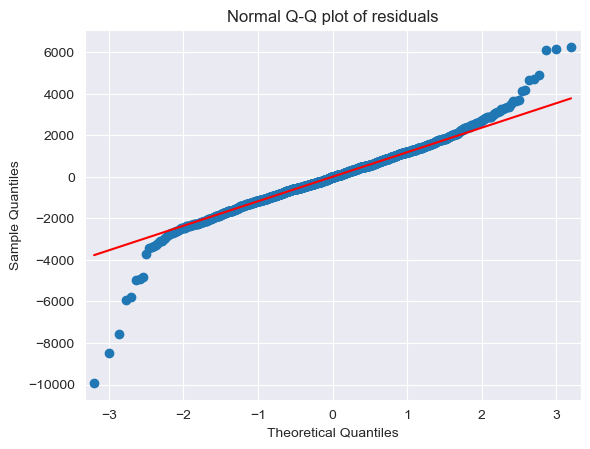

In [22]:
import statsmodels.api as sm 
qqplot = sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [23]:
list(np.where(model1.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [24]:
list(np.where(model1.resid<-6000))

[array([221, 601, 960], dtype=int64)]

# Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

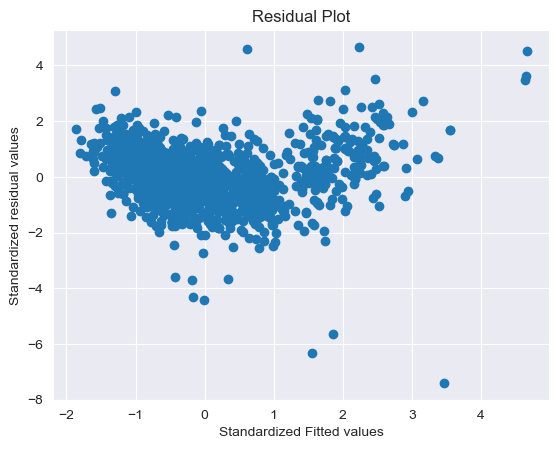

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


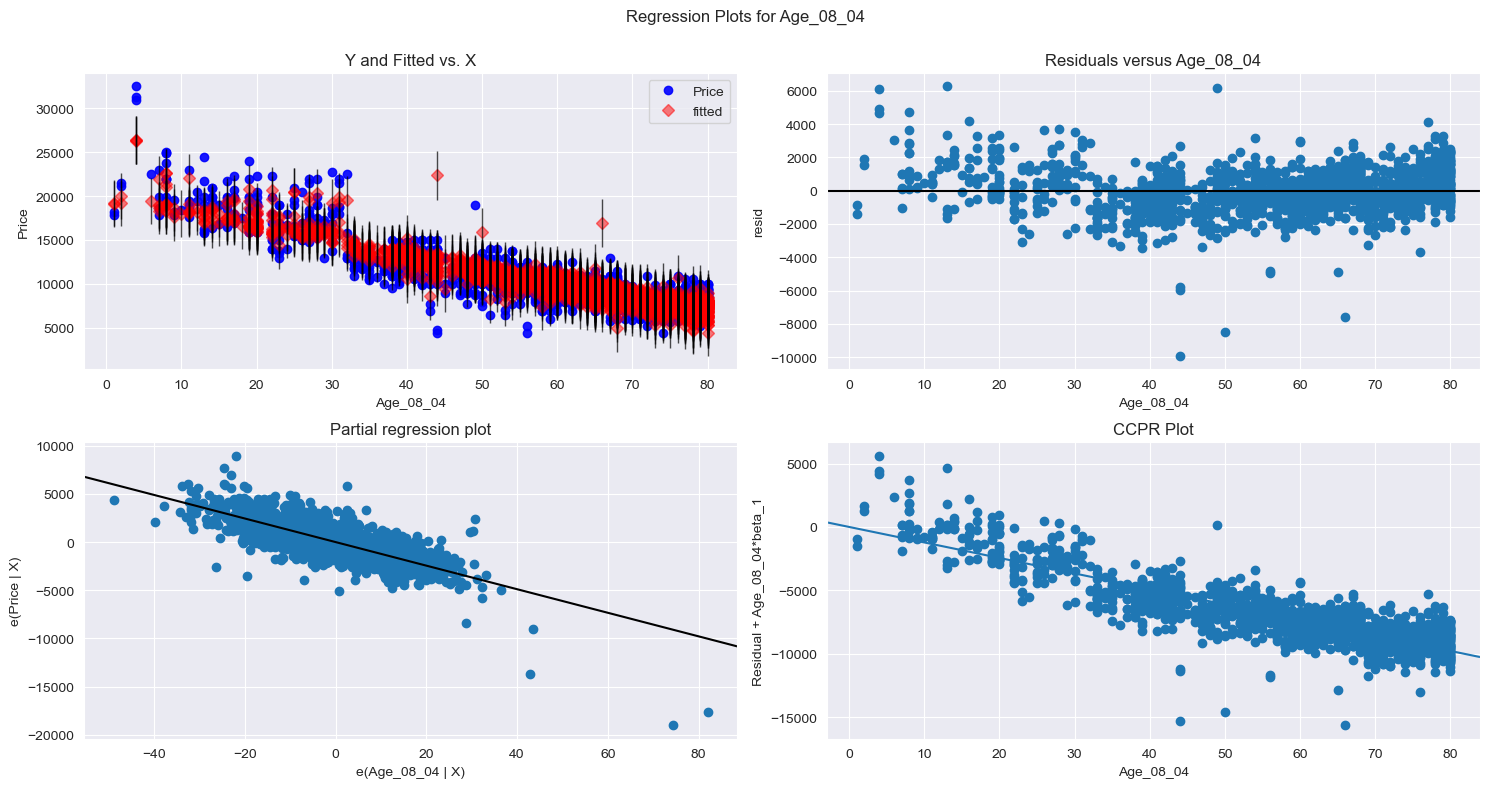

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'Age_08_04', fig=fig)
plt.show()

eval_env: 1


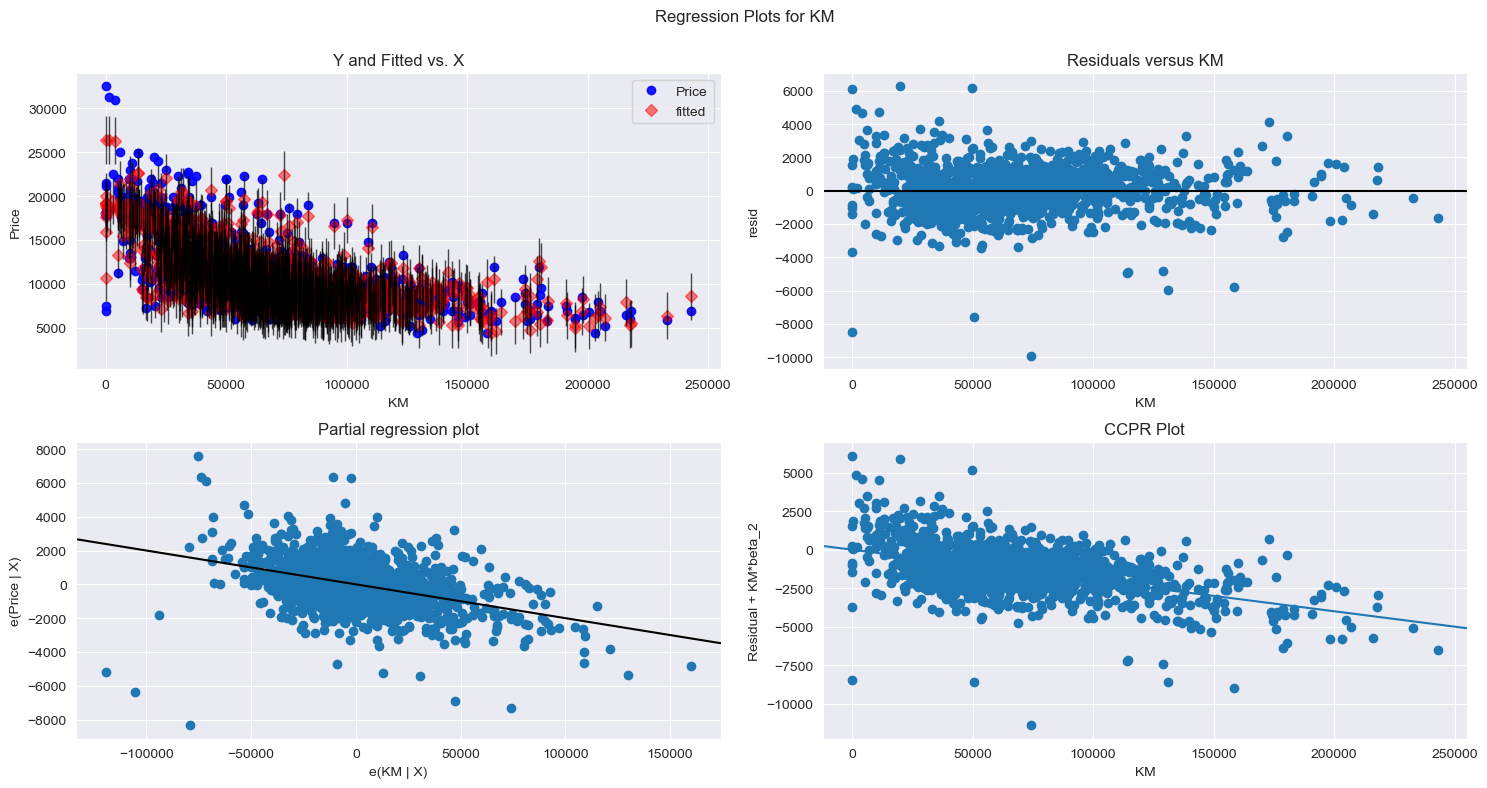

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'KM', fig=fig)
plt.show()

eval_env: 1


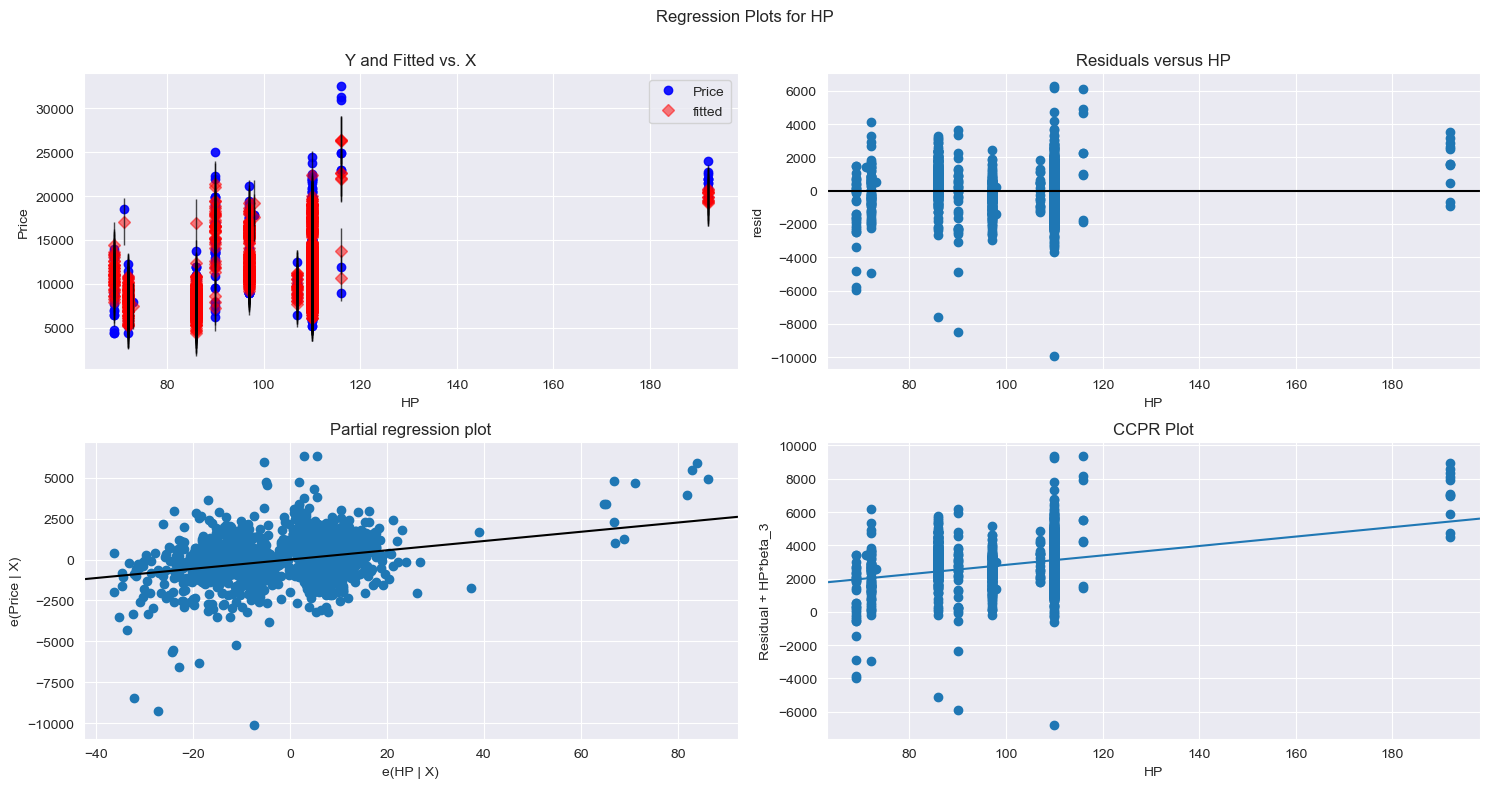

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'HP', fig=fig)
plt.show()

eval_env: 1


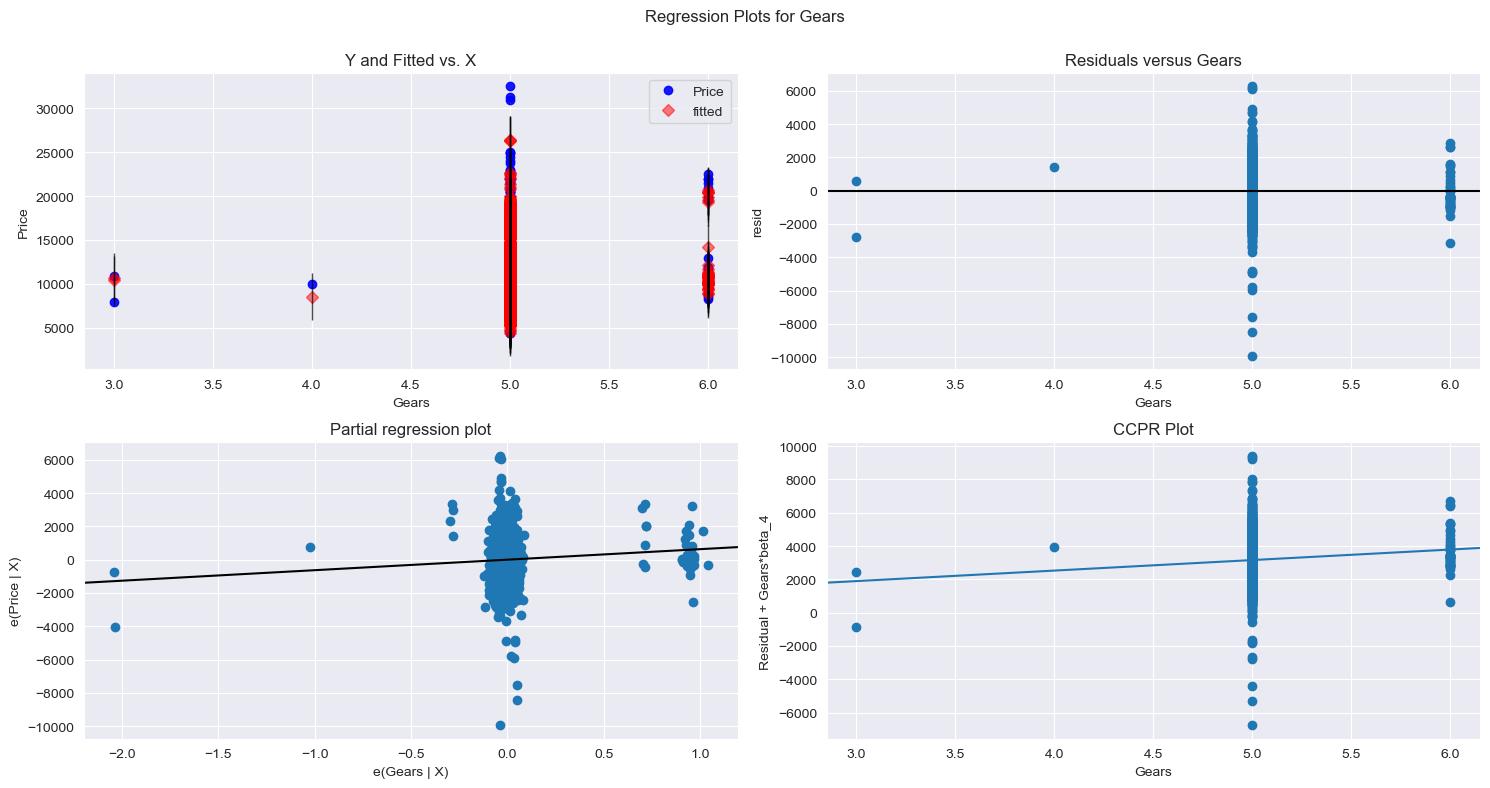

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'Gears', fig=fig)
plt.show()

eval_env: 1


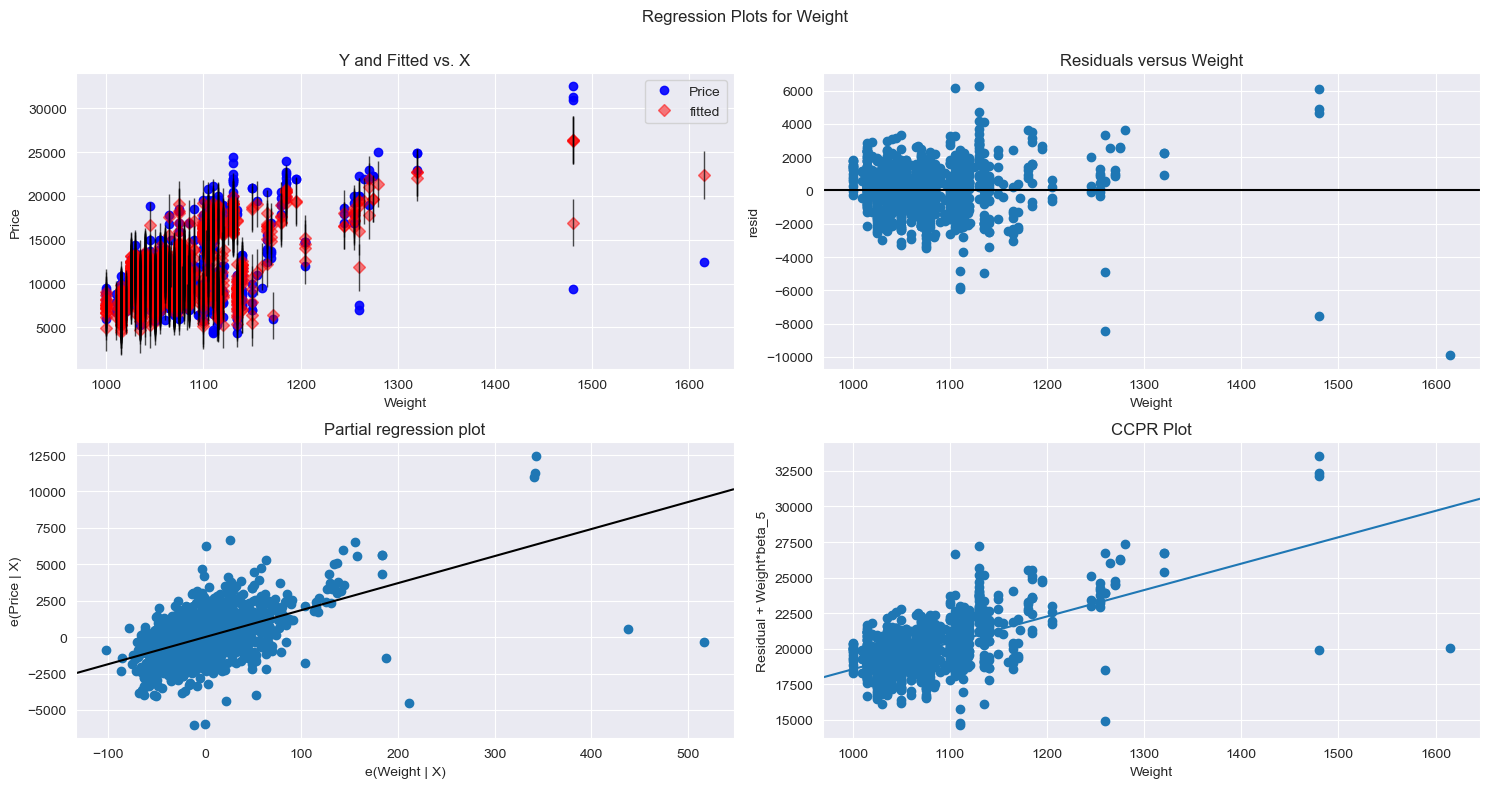

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostic

# Detecting Influencers/Outliers

# Cook's Distance

In [32]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

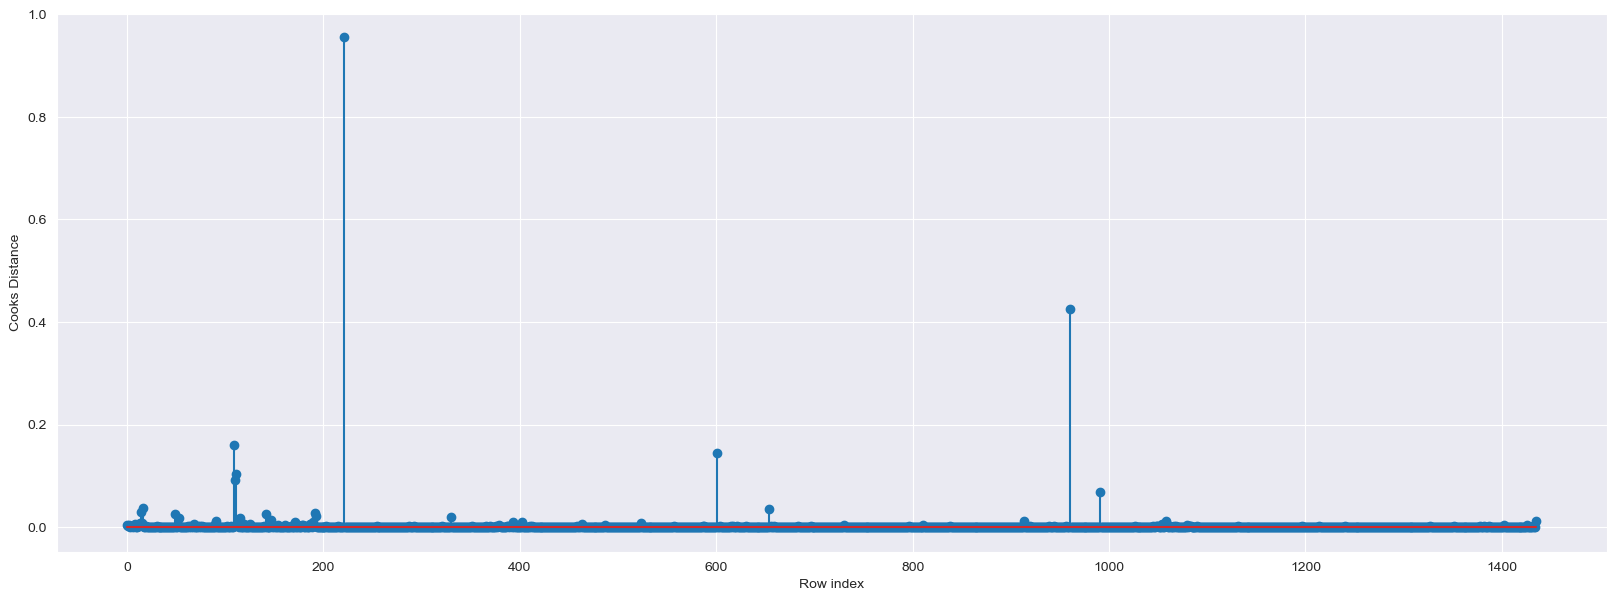

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.9553151438694716)

# High Influence points

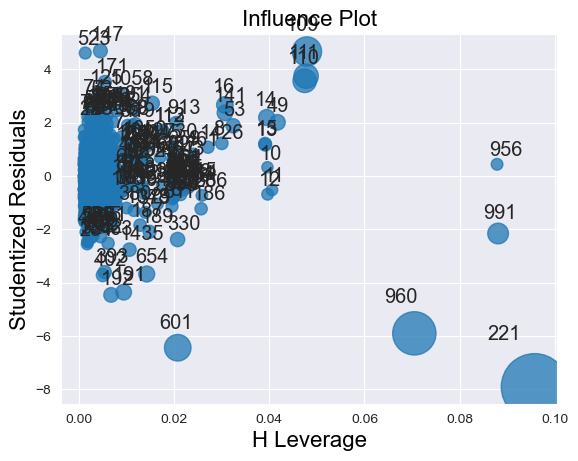

In [35]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [36]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)

From th above plot, it is evident that data points 70 and 76 are the influences

In [37]:
car2[car2.index.isin([221,960])]

,Price,Age_08_04,KM,HP,Gears,Weight
221,12450,44,74172,110,5,1615
960,9390,66,50806,86,5,1480


In [38]:
#See the Difference in HP and other variable values
car2.head()

,Price,Age_08_04,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170


# Improving the model

In [39]:
#Load the data
cars_new = pd.read_csv("C:\\Users\\Admin\\Downloads\\Toyoto_Corrola.csv")

In [40]:
car3=cars_new.drop(cars_new.index[[221,960]],axis=0).reset_index()

In [41]:
car3=car3.drop(['index'],axis=1)

In [42]:
car3

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [43]:
car4 = car3.drop(['Id','Model','Cylinders'],axis=1)
car4.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


# Build Model

In [44]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car4).fit()

In [45]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8728201848607587, 24633.588496856977)

In [46]:
#R squared values
(final_ml_V.rsquared,final_ml_V.rsquared_adj)

(0.8728201848607587, 0.8722854414193884)

# Cook’s Distance

In [47]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

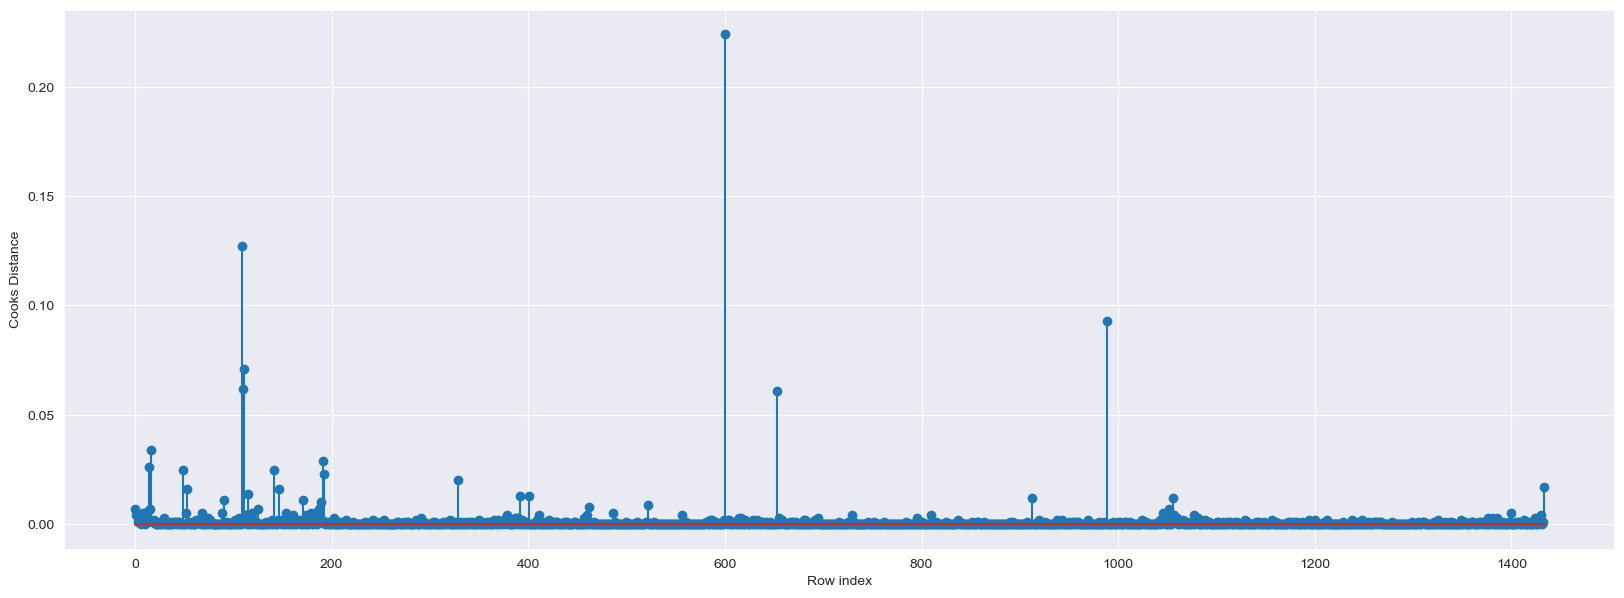

In [48]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

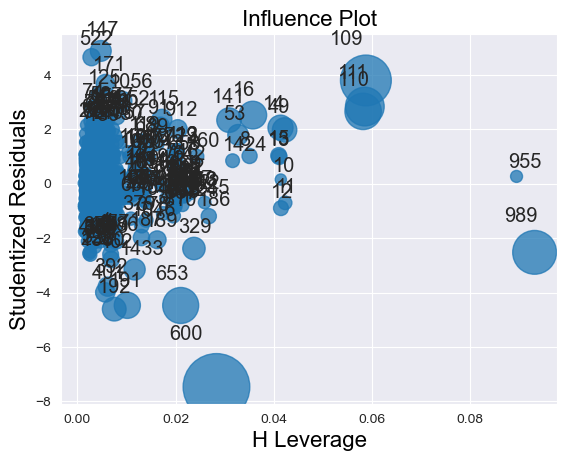

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_ml_V)
plt.show()

In [50]:
(np.argmax(c_V),np.max(c_V))

(600, 0.2236546604700048)

In [52]:
#Drop 76 and 77 observations
car5=car4.drop(car1.index[[600,111]],axis=0)

In [53]:
car5

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1429,7500,69,20544,86,3,5,1025
1430,10845,72,19000,86,3,5,1015
1431,8500,71,17016,86,3,5,1015
1432,7250,70,16916,86,3,5,1015


In [54]:
car6=car5.reset_index()

In [55]:
car7=car6.drop(['index'],axis=1)

In [56]:
car7

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1427,7500,69,20544,86,3,5,1025
1428,10845,72,19000,86,3,5,1015
1429,8500,71,17016,86,3,5,1015
1430,7250,70,16916,86,3,5,1015


In [57]:
#Build the model on the new data
final_ml_V1= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car7).fit()

In [58]:
(final_ml_V1.rsquared,final_ml_V1.aic)

(0.8753315081634958, 24539.474596720625)

In [59]:
#R squared values
(final_ml_V1.rsquared,final_ml_V1.rsquared_adj)

(0.8753315081634958, 0.8748065881978684)

In [60]:
model_influence_V1 = final_ml_V1.get_influence()
(c_V, _) = model_influence_V1.cooks_distance

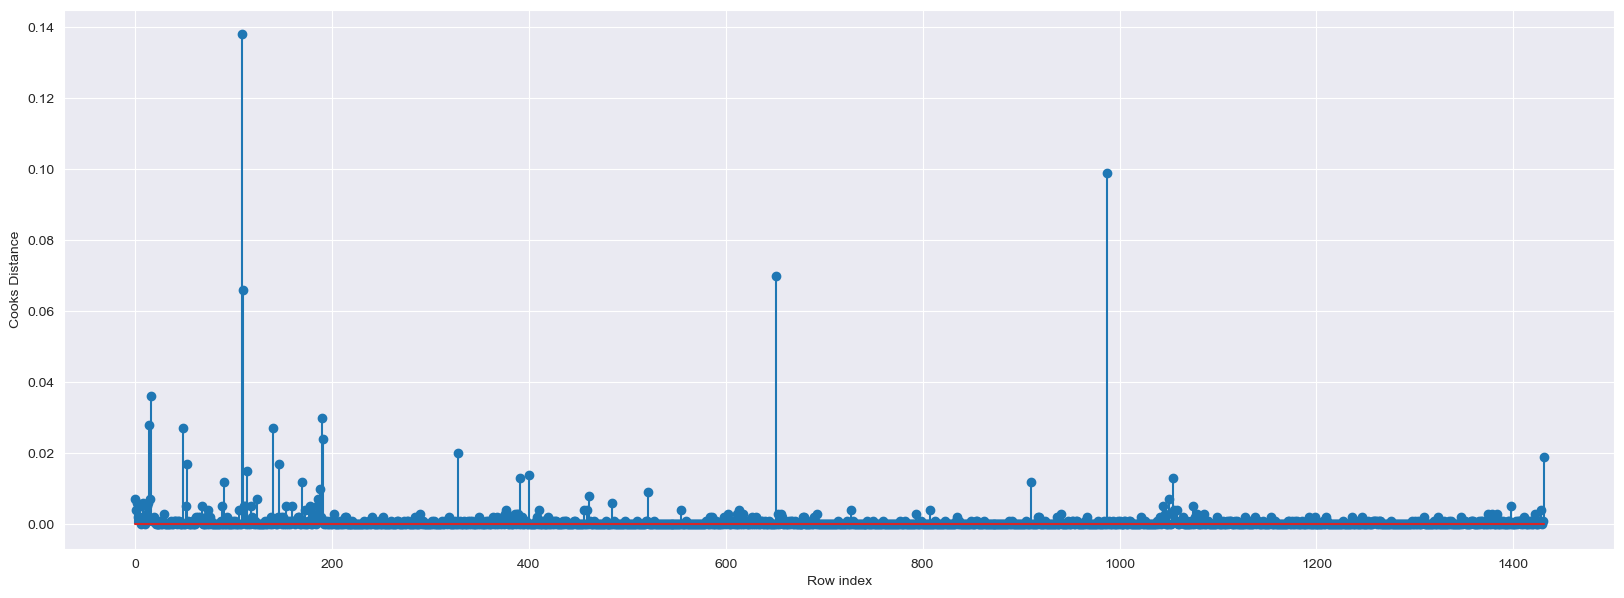

In [61]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [62]:
(np.argmax(c_V),np.max(c_V))

(109, 0.13754728025826454)

In [63]:
(final_ml_V1.rsquared,final_ml_V1.aic)

(0.8753315081634958, 24539.474596720625)

# Predicting for new data

In [65]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':40,"KM":20000,"HP":100, "Doors": 3, "Gears" : 5,"Weight":1170},index=[1])
final_ml_V1.predict(new_data)

1    15916.708375
dtype: float64

In [66]:
final_ml_V1.predict(cars_new.iloc[0:5,])

0    16887.061277
1    16308.818200
2    16889.883354
3    16520.319032
4    16387.827197
dtype: float64

In [68]:
pred_y = final_ml_V1.predict(cars_new)
pred_y

0       16887.061277
1       16308.818200
2       16889.883354
3       16520.319032
4       16387.827197
            ...     
1431     8882.391127
1432     8343.261821
1433     8502.185591
1434     8619.129864
1435    11070.208013
Length: 1436, dtype: float64